# <center>**Introduction to Data Science and Data Engineering**</center>



## Topics to be covered

* [Machine learning algorithms and mathematical underpinnings](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf)
* Sample projects
* Examples in both [scikit-learn](https://scikit-learn.org/stable/) and [spark](https://spark.apache.org/)
* [Python](https://www.python.org/), [NumPy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/)
* How real data project works. Agile process, [Git](https://git-scm.com/), CI/CD, DevOps, Measurement
* Prep for job interview

## Buzzwords

* AI
* Machine Learning
* Data Science
* Data Engineering
* Data Analysis
* Deep Learning
* ....

![ai_ml_dl](./pics/ai_ml_dl.png)

## Data Science v.s. Data Engineer

![data_project_flow](./pics/data_project_flow.jpeg)

* Data engineer: step 1 and step 2
* Data scientist: step 3 and step 4
* Ultimate goal is to leverage model to make prediction, get insight out of data
* 80/20 rules
  * 80% time are spent on data engineering
  * 80% chance (or even more) you do not need a new model

## How to cover all those topics in weeks

> 道生一，一生二，二生三，三生万物

* **道**：科学规律 (Science)
* **一**：机器学习方法论 (Machine Learning Methodology)
* **二**：分类和回归 (Classification and Regression)
* **三**：模型，策略，最优化 (Model, Strategy, Optimisation)
* **万**：算法 (Algorithms)

## Technology stack and why

### 1. Programming language trend

|![python_trend](./pics/trends/python_trend.png)|![r_trend](./pics/trends/r_trend.png)|
|-|-|
|![scala_trend](./pics/trends/scala_trend.png)|![python_trend](./pics/trends/java_trend.png)|

#### 2019 Stackoverflow Survey

|![so_lang_ranking](./pics/so_lang_ranking.png)|![so_type_salary](./pics/so_type_salary.png)|
|-|-|
|![salary_language](./pics/so_salary_language.svg)|![salary_devtype](./pics/so_salary_devtype.svg)|

### 2. scikit-learn ecosystem

|![sklearn_trend.png](./pics/trends/sklearn_trend.png)|![numpy_trend](./pics/trends/numpy_trend.png)|
|-|-|
|![pandas_trend](./pics/trends/pandas_trend.png)|![matplotlib_trend](./pics/trends/matplotlib_trend.png)|

### 3. Apache Spark big data platform

> **Apache Spark™ is a unified analytics engine for large-scale data processing**

![why_spark](./pics/why_spark.png)

### Apache Spark v.s. Hadoop

|![spark_trend.png](./pics/trends/spark_trend.png)|![hadoop_trend](./pics/trends/hadoop_trend.png)|
|-|-|
|![spark_sql_trend](./pics/trends/spark_sql_trend.png)|![hive_trend](./pics/trends/hive_trend.png)|

### Quote from Facebook

#### [Apache Spark @Scale: A 60 TB+ production use case](https://engineering.fb.com/core-data/apache-spark-scale-a-60-tb-production-use-case/)

> ... we showed that Spark could <font color=red>**reliably shuffle and sort 90 TB+ intermediate data and run 250,000 tasks in a single job**</font>. The Spark-based pipeline produced <font color=red>**significant performance improvements (4.5-6x CPU, 3-4x resource reservation, and ~5x latency)**</font> compared with the old Hive-based pipeline, and it has been running <font color=red>**in production for several months**</font>. While this post details our most challenging use case for Spark, a growing number of customer teams have deployed Spark workloads into production. <font color=red>**Performance, maintainability, and flexibility**</font> are the strengths that continue to drive more use cases to Spark. Facebook is excited to be a part of the Spark open source community and will <font color=red>**work together to develop Spark toward its full potential**</font>.

|![hive_vs_spark_cpu](./pics/hive_vs_spark_cpu.jpeg)|![hive_vs_spark_latency](./pics/hive_vs_spark_latency.jpeg)|
|-|-|

## How the courses are organized

### 0. Introduction

### 1. Just enough basics before start

### 2~7. Machine learning algorithms

   * Cover both regression and classification
   * Explain math under the hood in human language
   * Variations in the same family
   * Example with scikit-learn or Spark ML
   * Explain programming details inline

### 7~8. Prepar for job interview

*NOTE: everything is code shared via github*

<hr/>

## Univariate Linear Regression

### 0. In a perfect world

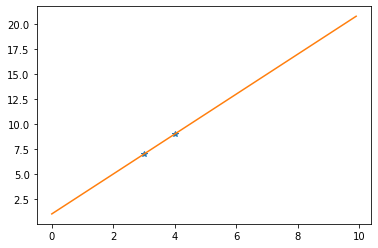

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([3, 4])
y = np.array([7, 9])
plt.plot(x, y, '*')

x = np.arange(0, 10, 0.1)
y = 2* x + 1
plt.plot(x, y, '-')

### 1. In a real world

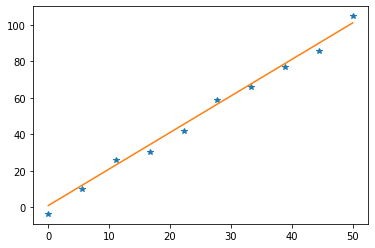

In [21]:
n = 10
mu, sigma = 0, 4
x = np.linspace(0, 50, n)
e = np.random.normal(mu, sigma, n)

y = 2 * x + 1 + e
plt.plot(x, y, '*')

y_fit = 2 * x + 1
plt.plot(x, y_fit, '-')

### 2. An example in [scikit-learn](https://scikit-learn.org/stable/)

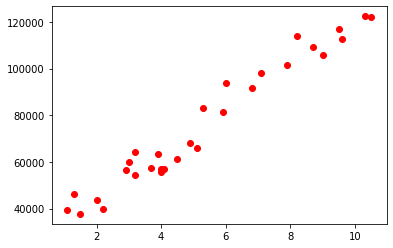

In [5]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pandas.read_csv('data/salary.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

plt.scatter(x, y, color = 'red')

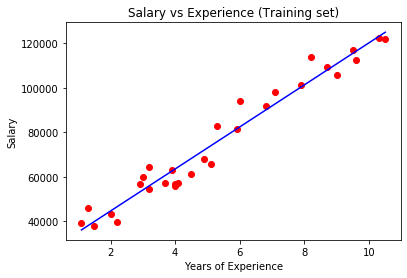

In [6]:
linearRegressor = LinearRegression()
# train the model
linearRegressor.fit(x, y)

prediction = linearRegressor.predict(x)

plt.scatter(x, y, color = 'red')
plt.plot(x, prediction, color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [7]:
print(linearRegressor.coef_)
print(linearRegressor.intercept_)

[9449.96232146]
25792.200198668696


### 3. Same example in [Spark MLlib](https://spark.apache.org/mllib/)

In [11]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

spark = SparkSession.builder.appName("introduction").getOrCreate()
df = spark.read.csv('data/salary.csv', header=True, inferSchema=True).cache()
# df.show()

In [12]:
vectorAssembler = VectorAssembler(inputCols = ['years_experience'], outputCol = 'features')
df_train = vectorAssembler.transform(df)
# df_train.show()

In [13]:
lr = LinearRegression(featuresCol = 'features', labelCol='salary')
# train the model
lr_model = lr.fit(df_train)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [9449.962321455081]
Intercept: 25792.20019866867


In [14]:
# predict
df_prediction = lr_model.transform(df_train)
df_prediction.show()

+----------------+-------+--------+------------------+
|years_experience| salary|features|        prediction|
+----------------+-------+--------+------------------+
|             1.1|39343.0|   [1.1]| 36187.15875226926|
|             1.3|46205.0|   [1.3]|38077.151216560276|
|             1.5|37731.0|   [1.5]|39967.143680851295|
|             2.0|43525.0|   [2.0]| 44692.12484157883|
|             2.2|39891.0|   [2.2]| 46582.11730586985|
|             2.9|56642.0|   [2.9]|  53197.0909308884|
|             3.0|60150.0|   [3.0]| 54142.08716303391|
|             3.2|54445.0|   [3.2]| 56032.07962732493|
|             3.2|64445.0|   [3.2]| 56032.07962732493|
|             3.7|57189.0|   [3.7]| 60757.06078805248|
|             3.9|63218.0|   [3.9]| 62647.05325234348|
|             4.0|55794.0|   [4.0]| 63592.04948448899|
|             4.0|56957.0|   [4.0]| 63592.04948448899|
|             4.1|57081.0|   [4.1]|  64537.0457166345|
|             4.5|61111.0|   [4.5]| 68317.03064521654|
|         

<hr/>

### With less than 10 lines of code, we've just implemented out first machine learning project in 2 most popular libraries!!!

0. Load the data
1. Choose a model. Assume salary is linear to years of experience 
2. Train (Fit)
3. Get the  model

### Now we can predict salary given years of experience!!!

<hr/>

## Homework. Environment setup

0. Install latest Python 3.7.x
1. Install git, create github account
2. Clone git repository, run make command to setup Python venv for this course automatically
3. Run Jupyter notebook and load learning material
4. Play with the sample code and try your own